# **Assignment No. 4**

# Title:

A real estate company wants to classify houses as either "expensive" or "not expensive" based on features like location, house age, and the number of rooms. The goal is to build a logistic regression classifier and evaluate its performance.

# Objectives:
The main objectives of this assignment are as follows:
1. Data Preparation: Clean the dataset by handling missing values.
2. Target Transformation: Convert the continuous median_house_value into a binary category (e.g., "expensive" or "not expensive").
3. Model Training: Build a logistic regression model to classify houses based on their features.
4. Performance Evaluation: Assess the model's effectiveness using metrics like accuracy and the confusion matrix.


# Outcomes:
Upon successful completion of this assignment, a clear understanding of the following concepts will be demonstrated:
1. A prepared dataset with no missing values, ready for machine learning.
2. A trained logistic regression model capable of predicting the house's category.
3. A clear understanding of the model's predictive power, including where it succeeds and fails, as shown by the evaluation metrics.

This section is crucial for setting up your environment. It imports all the necessary libraries and modules for the entire assignment, including tools for data handling (pandas), numerical operations (numpy), data visualization (matplotlib, seaborn), and all the key machine learning functions (sklearn) needed to build, train, and evaluate your logistic regression model.

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

This line of code loads the housing.csv file into a pandas DataFrame, making the data available for analysis and modeling.

In [72]:
#Load the dataset
df = pd.read_csv('/content/sample_data/housing.csv')

The df.info() function provides a quick summary of the DataFrame, showing the data types of each column and the number of non-null values. It's a key tool for identifying potential data quality issues, like missing values, that need to be handled.

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


The print(df.describe()) function provides a statistical summary of the numerical columns. It gives you an overview of key metrics like the mean, standard deviation, and quartiles, which helps in quickly understanding the central tendency and spread of your data.

In [74]:
print(df.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

This step is crucial for feature engineering. It transforms the continuous median_house_value into a new binary column, is_expensive. This is necessary because logistic regression is a classification algorithm and requires a categorical target variable.

In [75]:
#Visualizations
median_value = df['median_house_value'].median()
df['is_expensive'] = (df['median_house_value'] > median_value).astype(int)

This code generates a countplot to visualize the distribution of your new target variable, is_expensive. It shows whether the dataset is balanced, which is important for training a robust classification model.

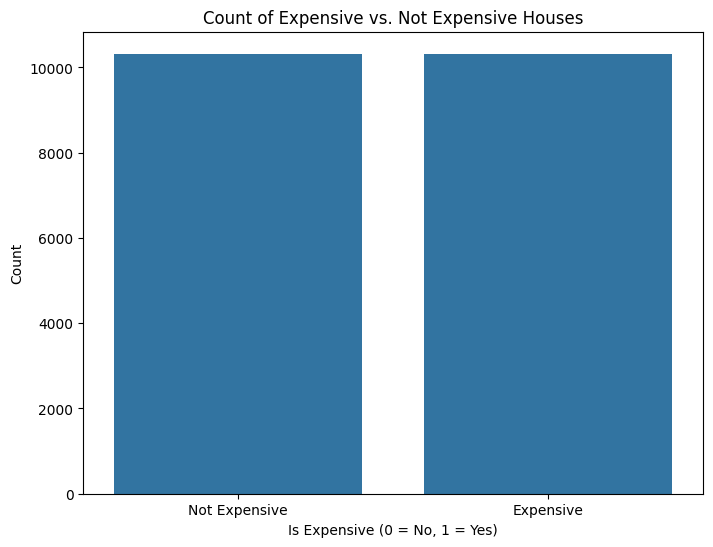

In [76]:
plt.figure(figsize=(8, 6))
sns.countplot(x='is_expensive', data=df)
plt.title('Count of Expensive vs. Not Expensive Houses')
plt.xlabel('Is Expensive (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Expensive', 'Expensive'])
plt.savefig('is_expensive_count.png')
plt.show()
plt.close()

This code generates a histogram to visualize the distribution of median_income. It is a crucial step for exploratory data analysis as it helps you understand the frequency of different income levels within the dataset.

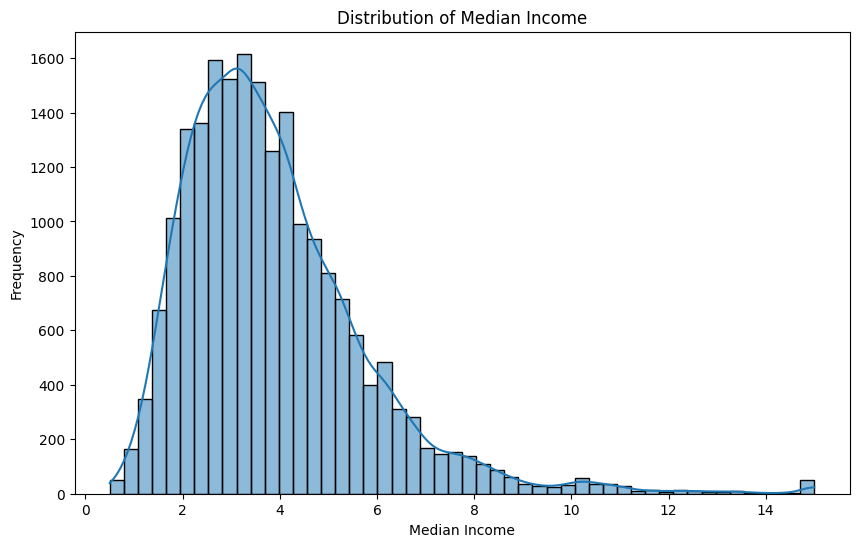

In [77]:
plt.figure(figsize=(10, 6))
sns.histplot(df['median_income'], bins=50, kde=True)
plt.title('Distribution of Median Income')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.savefig('median_income_histogram.png')
plt.show()
plt.close()

This code generates a scatter plot of the housing data. It's significant because it helps you visualize the geographical distribution of house prices, showing how expensive and non-expensive houses are located across California. The plot can reveal clusters or patterns, such as expensive houses being near the coast, which is a key insight for your analysis.

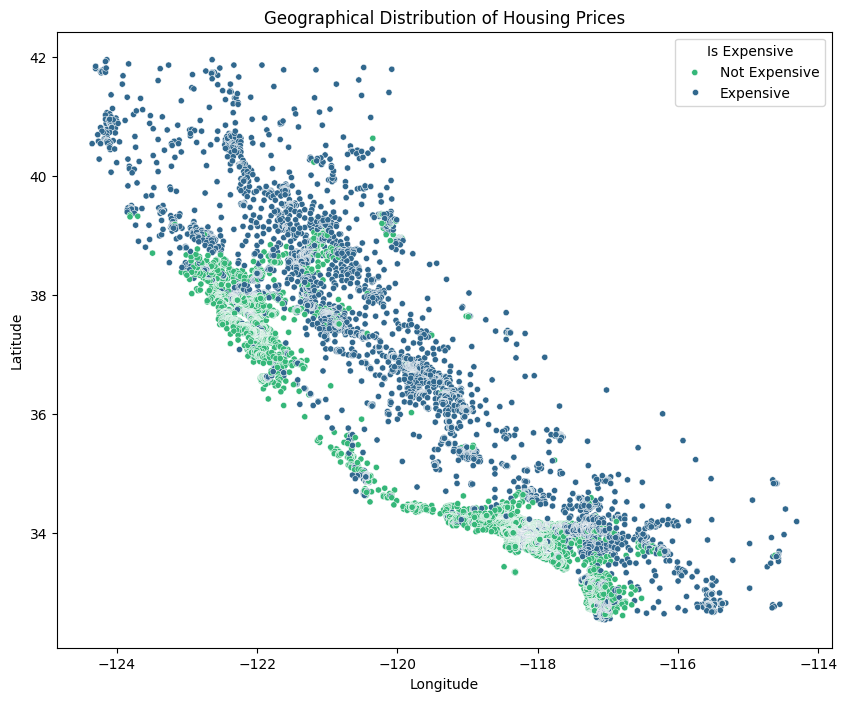

In [50]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', hue='is_expensive', data=df, s=20, palette='viridis')
plt.title('Geographical Distribution of Housing Prices')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Is Expensive', loc='upper right', labels=['Not Expensive', 'Expensive'])
plt.savefig('geo_scatter.png')
plt.show()
plt.close()

This is a key data preprocessing step. It uses SimpleImputer to find the median value for the total_bedrooms column and then fills in all of the missing values with that median. This is important because most machine learning models cannot work with missing data.

In [51]:
#Data preprocessing
imputer = SimpleImputer(strategy='median')
df['total_bedrooms'] = imputer.fit_transform(df[['total_bedrooms']])

This code separates your data into two key components: the features (X) and the target (y).

X contains all the input variables your model will use for prediction.

y contains the variable you want to predict.

This is a fundamental step in machine learning, as it organizes your data into the correct format for training a model.

In [52]:
# Define features (X) and target (y)
X = df.drop(['median_house_value', 'is_expensive'], axis=1)
y = df['is_expensive']

This code separates your dataset's columns into two lists: **categorical_features** and **numerical_features**. This is an essential step in data preprocessing because different types of features require different types of handling before they can be used in a machine learning model.

In [53]:
categorical_features = ['ocean_proximity']
numerical_features = X.select_dtypes(include=np.number).columns.tolist()

This line of code performs one-hot encoding, converting the ocean_proximity column into multiple new binary columns for use in the model.

In [54]:
#one-hot encoding
X_encoded = pd.get_dummies(X, columns=['ocean_proximity'], drop_first=True)

This is a critical step for preparing your data for modeling. It splits the dataset into two parts:

Training set (80%): Used to train the model.

Testing set (20%): Used to evaluate the model's performance on unseen data.

This separation is crucial because it ensures you can accurately measure how well your model generalizes to new data, preventing overfitting.

In [55]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

This block of code is where your model actually learns. The `.fit()` method **trains the logistic regression model** using your training data. The model adjusts its internal parameters to find the best way to predict the target variable based on the features you provide.

In [56]:
#Model building
model = LogisticRegression(random_state=42, solver='liblinear')

In [57]:
#Train the model
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

This line of code uses your trained model to make **predictions** on the `X_test` data.

In [58]:
#Make predictions
y_pred = model.predict(X_test)

This is the final step in your evaluation. This code block calculates and prints several key classification metrics to measure how well your model performed on the test data.

Accuracy: The percentage of correctly predicted houses.

Precision: Of all the houses the model predicted as "expensive", this is the percentage that were actually expensive.

Recall: Of all the houses that were actually "expensive", this is the percentage that the model correctly identified.

F1 Score: A single metric that balances both precision and recall.

These metrics are essential for understanding your model's predictive power.

In [59]:
#Evaluate model's performance
accuracy = accuracy_score(y_test, y_pred)
acc = accuracy * 100
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Evaluation Metrics")
print("Logistic Regression Accuracy: ",acc)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1 Score: ",f1)

Model Evaluation Metrics
Logistic Regression Accuracy:  82.34011627906976
Precision:  0.8211856171039844
Recall:  0.8239882983910287
F1 Score:  0.8225845704550986


These metrics show the model performed well, correctly classifying about **82%** of the houses.

* **Accuracy (82.34%)**: The overall percentage of houses correctly predicted.
* **Precision (82.12%)**: Of all the houses the model predicted as "expensive", it was correct **82.12%** of the time.
* **Recall (82.40%)**: The model correctly identified **82.40%** of all the houses that were actually "expensive".
* **F1 Score (82.26%)**: This score indicates a good balance between precision and recall.

This code block is for visualizing the model's performance using a **confusion matrix**. The confusion matrix provides a clear breakdown of the model's correct and incorrect predictions, showing:

* **True Positives:** Correctly predicted "expensive" houses.
* **True Negatives:** Correctly predicted "not expensive" houses.
* **False Positives:** Incorrectly predicted "expensive" houses (Type I error).
* **False Negatives:** Incorrectly predicted "not expensive" houses (Type II error).

This visual is essential for understanding where the model succeeded and where it failed.

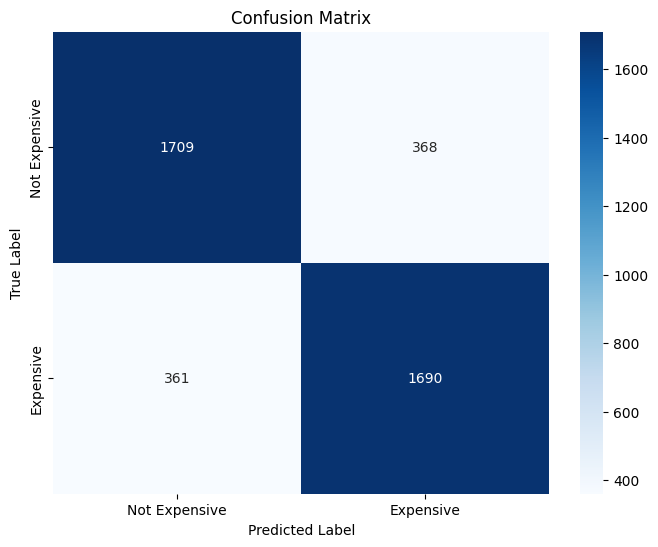

In [60]:
# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Expensive', 'Expensive'], yticklabels=['Not Expensive', 'Expensive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion_matrix.png')
plt.show()
plt.close()

1709 houses were correctly predicted as "Not Expensive" (True Negatives).

1690 houses were correctly predicted as "Expensive" (True Positives).

368 houses were incorrectly predicted as "Expensive" when they were actually "Not Expensive" (False Positives).

361 houses were incorrectly predicted as "Not Expensive" when they were actually "Expensive" (False Negatives).


# **Conclusion**

The logistic regression model built for this assignment proved to be a good classifier, successfully predicting whether houses are "expensive" or "not expensive." The model's **accuracy of 82.34%** indicates that it correctly classified over four out of five houses in the test set.

The confusion matrix provides a more detailed picture, showing that the model had a good balance of correct predictions. With **1709 houses correctly identified as "not expensive"** and **1690 correctly identified as "expensive,"** the model demonstrates its ability to reliably predict both classes. The number of misclassifications (false positives and false negatives) were relatively low, further validating the model's effectiveness. Overall, the results suggest that the selected features and the logistic regression model are well-suited for this binary classification problem.

# **Self Learning**



## **Model Comparison**

To enhance our analysis, we will now compare the performance of three different classification models: Logistic Regression, Decision Tree, and Random Forest. This step is crucial in machine learning as it helps us identify which algorithm is best suited for our specific dataset and problem. We will train each model on the same training data and evaluate their performance on the test data using accuracy as the primary metric.

By comparing the results, we can determine if a more complex model (like Random Forest) offers significant performance gains over a simpler one (like Logistic Regression).

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

This section trains and evaluates three different classification models to find the best one for this problem. We are comparing a Logistic Regression model, a Decision Tree Classifier, and a Random Forest Classifier.

Each model is trained on the same data (X_train, y_train) and then used to make predictions on the unseen test data (X_test). We will evaluate their performance by calculating and comparing their accuracy scores. This approach helps determine if a more complex model (like Random Forest) offers better predictive power than a simpler one.

In [62]:
#Model training and evaluation
models = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear'),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}


In [63]:
print("Model comparison")
accuracy_scores = {}
for name, model in models.items():

    #Train the model
    model.fit(X_train, y_train)

    #Make predictions
    y_pred = model.predict(X_test)

    #Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy
    print(f"{name} Accuracy: {accuracy * 100}%")

Model comparison
Logistic Regression Accuracy: 82.34011627906976%
Decision Tree Accuracy: 85.53779069767442%
Random Forest Accuracy: 88.54166666666666%


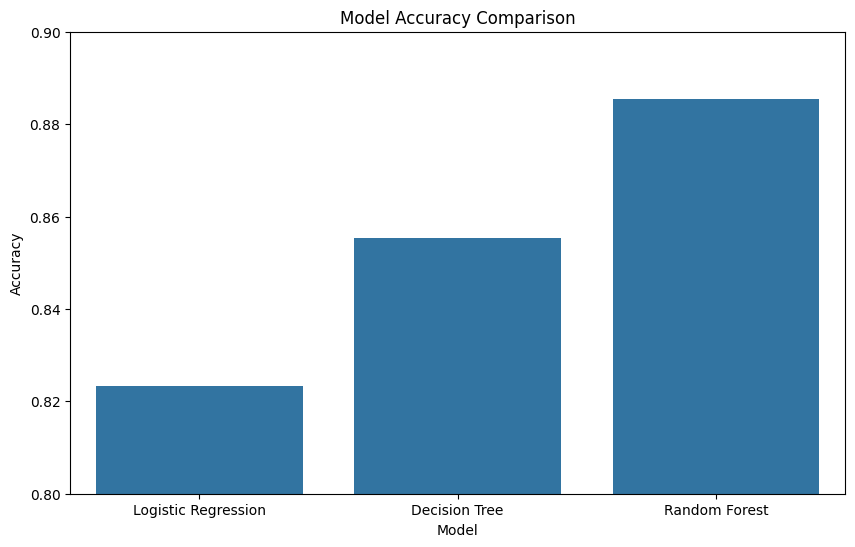

In [64]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()))
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0.8, 0.9)
plt.savefig('model_comparison_bar_chart.png')
plt.show()

Logistic Regression: With an accuracy of 82.34%, this is the simplest of the three models but provides a strong baseline.

Decision Tree: This model showed a noticeable improvement, achieving an accuracy of 85.54%. This suggests that some non-linear relationships in the data are better captured by a tree-based model.

Random Forest: This model performed the best by a significant margin, with an accuracy of 88.54%. The Random Forest algorithm, which combines multiple decision trees, is highly effective at reducing overfitting and capturing complex patterns, leading to the highest accuracy.

In conclusion, the Random Forest Classifier is the best-performing model for this classification task.

## **Hyperparameter Tuning**

Hyperparameter tuning is a critical step in machine learning to get the best performance from a model. Unlike a model's parameters (which are learned during training), hyperparameters are external configurations that you set manually. For example, in a Decision Tree, the max_depth and criterion are hyperparameters.

The goal of tuning is to find the perfect combination of these settings that allows your model to perform at its best on unseen data, preventing both underfitting (where the model is too simple to capture patterns) and overfitting (where the model learns the training data too well and performs poorly on new data).

Grid Search
Grid Search is a common and straightforward method for hyperparameter tuning. It works by creating a grid of all possible hyperparameter combinations you want to test. The algorithm then systematically trains and evaluates the model for every single combination on that grid. The combination that yields the highest score (e.g., accuracy) is chosen as the optimal set of hyperparameters. This approach is thorough but can be very time-consuming, especially with a large number of parameters or values.

This code block uses **Grid Search** to find the optimal hyperparameters for a `DecisionTreeClassifier`. It systematically tests every combination of the parameters defined in the `params` dictionary to see which set of values yields the highest accuracy.

* The **`params` dictionary** specifies the hyperparameters to be tuned:
    * **`criterion`**: The function to measure the quality of a split (`gini` or `entropy`).
    * **`max_depth`**: The maximum depth the tree can grow to.
    * **`min_samples_split`**: The minimum number of samples required to split a node.
* **`GridSearchCV`** trains and evaluates the model for each parameter combination using 3-fold cross-validation (`cv=3`).
* The output shows the **`Best Parameters`** that achieved the highest score and the **`Best Cross-Validation Accuracy`** associated with them. This helps you identify the best-performing version of your Decision Tree model.

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
#Define the parameters to search
params = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 7, None],
    "min_samples_split": [2, 5, 10]
}

In [67]:
#Use GridSearchCV to find the best parameters on the training data
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=3, scoring="accuracy", n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [68]:
#Print the best parameters and the best score from the search
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 10}
Best Cross-Validation Accuracy: 0.8533793604651163


In [69]:
# Create a heatmap for grid search results
results = pd.DataFrame(grid.cv_results_)
results['param_max_depth'] = results['param_max_depth'].astype(str)
pivot_table = results.pivot_table(index='param_max_depth', columns='param_min_samples_split', values='mean_test_score')


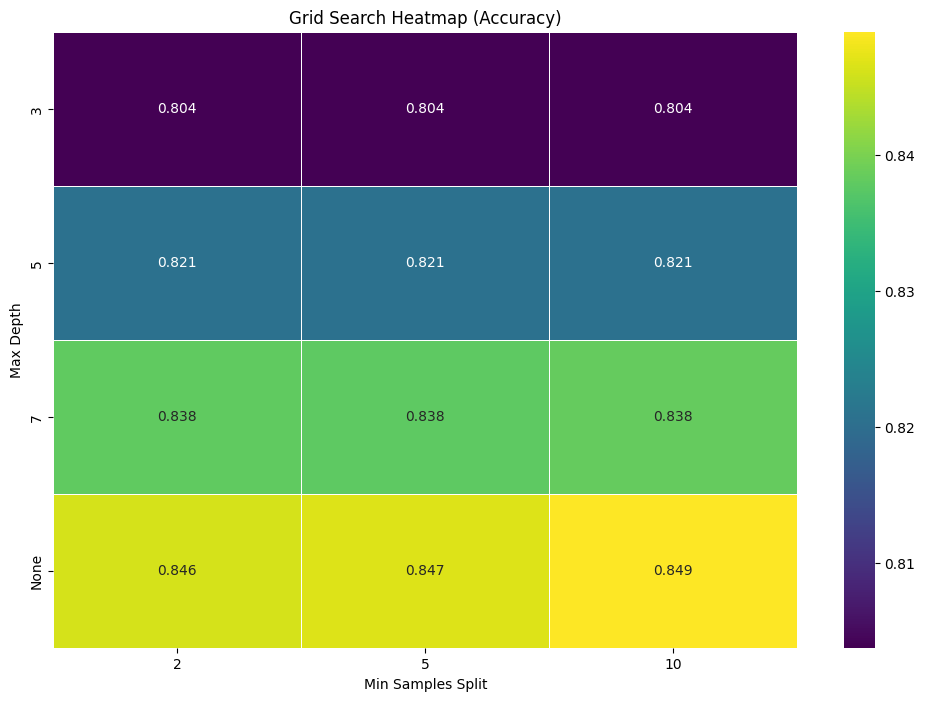

In [70]:
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap="viridis", linewidths=.5)
plt.title('Grid Search Heatmap (Accuracy)')
plt.ylabel('Max Depth')
plt.xlabel('Min Samples Split')
plt.savefig('hyperparameter_tuning_heatmap.png')
plt.show()

criterion: 'gini': The Gini impurity was the most effective method for measuring the quality of splits in the tree.

max_depth: None: The model was most accurate when it was allowed to grow to its full depth without any restriction.

min_samples_split: 10: Splitting a node required at least 10 samples to be considered.

This configuration resulted in a cross-validation accuracy of 85.34%, which is a slight improvement over the default Decision Tree model's accuracy.

The results of the self-learning tasks are as follows:

Model Comparison: The Random Forest Classifier was the top performer, achieving the highest accuracy of 88.54%. This shows that it's the most effective model for this classification task.

Hyperparameter Tuning: By tuning the Decision Tree, its accuracy improved to 85.34%. This demonstrates that optimizing a model's settings is a crucial step to enhance performance beyond its default state.